In [1]:
import pandas as pd
from plotnine import *

# importing statsmodels (for linear regression in python)
import statsmodels.formula.api as smf

# Load data



In [2]:
from plotnine.data import mtcars
mtcars

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


# Exploratory Data Analysis

In [3]:
# correlation matrix of mtcars
mtcars.corr().round(1)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0,-0.9,-0.8,-0.8,0.7,-0.9,0.4,0.7,0.6,0.5,-0.6
cyl,-0.9,1.0,0.9,0.8,-0.7,0.8,-0.6,-0.8,-0.5,-0.5,0.5
disp,-0.8,0.9,1.0,0.8,-0.7,0.9,-0.4,-0.7,-0.6,-0.6,0.4
hp,-0.8,0.8,0.8,1.0,-0.4,0.7,-0.7,-0.7,-0.2,-0.1,0.7
drat,0.7,-0.7,-0.7,-0.4,1.0,-0.7,0.1,0.4,0.7,0.7,-0.1
wt,-0.9,0.8,0.9,0.7,-0.7,1.0,-0.2,-0.6,-0.7,-0.6,0.4
qsec,0.4,-0.6,-0.4,-0.7,0.1,-0.2,1.0,0.7,-0.2,-0.2,-0.7
vs,0.7,-0.8,-0.7,-0.7,0.4,-0.6,0.7,1.0,0.2,0.2,-0.6
am,0.6,-0.5,-0.6,-0.2,0.7,-0.7,-0.2,0.2,1.0,0.8,0.1
gear,0.5,-0.5,-0.6,-0.1,0.7,-0.6,-0.2,0.2,0.8,1.0,0.3


/opt/homebrew/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/opt/homebrew/lib/python3.9/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


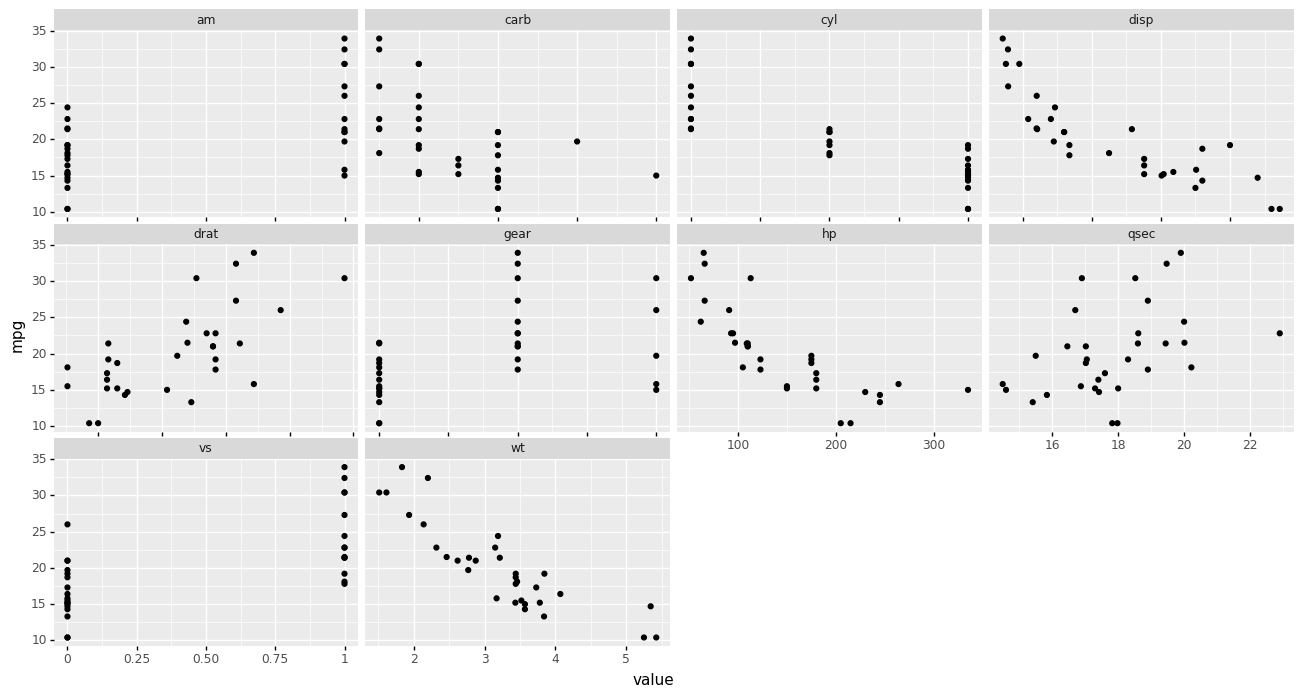

<ggplot: (309672623)>

In [4]:
# some plots with fuel efficiency as the dependent variable
# you can modify or copy/paste this as needed if you want to observe relationships in these variables visually

to_plot = mtcars.melt(id_vars=['name','mpg'])

(
    ggplot(to_plot, aes(x='value', y='mpg')) +
        geom_point() +
        facet_wrap('variable', scales='free_x') + 
        theme(figure_size=(16,8))
)

In [5]:
# Empty cells below for any additional exploratory data viz you'd like to do.

In [6]:
# # Pairplots...(uncomment to see this neat trick that Plotnine doesn't support yet)
# import seaborn as sns
# sns.pairplot(mtcars)

# Regression models

In [8]:
# Here is a cell with a linear regression on mtcars to get you started
# mpg ~ wt + disp
# modify the formula and paste in subsequent cells to run different models
# you can use forward selection, backwards selection, or your own approach

import statsmodels.formula.api as smf

model = smf.ols("mpg ~ wt + disp", data=mtcars)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     51.69
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           2.74e-10
Time:                        13:25:45   Log-Likelihood:                -78.084
No. Observations:                  32   AIC:                             162.2
Df Residuals:                      29   BIC:                             166.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.9606      2.165     16.151      0.000      30.534      39.388
wt            -3.3508      1.164     -2.878      0.007      -5.732      -0.970
disp          -0.0177      0.009     -1.929      0.064      -0.037       0.001
==============================================================================
Omnibus:                        4.079   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                3.665
Skew:                           0.812   Prob(JB):                        0.160
Kurtosis:                       2.666   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

👉 In the cells below, use either forward or backward selection to identify a model that fits this data and best explains the differences in a car's fuel efficiency. You can try various different models, see how they perform.

Remember, these aren't just abstract numbers in a vacuum. They are real data about real cars. Each variable has a meaning. Before just dropping it in your regression, as yourself what it means to explain the variance in `mpg` using that variable. Does that **methodological choice** make sense? 

Paste the model that you think best explains the variance in fuel efficiency below 👉

# Next steps

Woohoo! We totally understand how engineers in the 1970s designed cars right? Our regressions answered all of our questions? Time to write an article?

...As you can probably tell, we're not quite there yet.

This analysis may have answered some questions that you had but raised others.

What have you learned about each of the following variables and their impact on fuel efficiency?

- cyl (Number of Cylinders)
- disp (Displacement cu.in.)
- hp (Gross horsepower)
- drat (Rear axle ratio)
- wt (Weight)
- qsec (1/4 mile time)
- vs (Engine type - V-shape or Straight)
- am (Transmission Type - Autmoatic or Manaul)
- gear (Number of gears in the transmission)
- carb (Number of carburetor barrels)

Game out what your next steps would be. If you have the opportunity to speak to a car expert (hint: you will!) and the opportunity to speak to a stats expert (hint: you will!) what would you ask them?


## Reporting

Car design has evolved significantly since this dataset was published. Your goal is to understand what made a car fuel efficient (or not) in the 1970s/80s. What were the tradeoffs that a car maker had to make? How did those tradeoffs impact fuel effienceny? How are these variables all related to one another?

# What are 3-5 questions you have for a domain expert?
- 
- 
-

# What are 3-5 questions you have for a statistician?
- 
- 
-